In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

from PopSynthesis.Methods.connect_HH_PP.paras_dir import processed_data, output_dir, data_dir

In [62]:
font = {'weight' : 'bold',
        'size'   : 18}
plt.rc('font', **font)

geo_lev = "SA1"

In [58]:
syn_hh = pd.read_csv(os.path.join(output_dir, geo_lev,"syn_hh_final.csv"))
syn_pp = pd.read_csv(os.path.join(output_dir, geo_lev,"syn_pp_final.csv"))

In [63]:
dict_hhid = dict(zip(syn_hh["hhid"], syn_hh[geo_lev]))
syn_pp[geo_lev] = syn_pp.apply(lambda r: dict_hhid[int(r["hhid"])],axis=1)
syn_pp

,age,sex,persinc,nolicence,anywork,hhid,relationship,SA1
0,50-59,M,$1250-1499 p.w.,Some Licence,Y,1760558,Spouse,21104127205
1,50-59,M,$1250-1499 p.w.,Some Licence,Y,2094387,Spouse,21205132316
2,40-49,M,$600-799 p.w.,Some Licence,Y,328684,Spouse,20401105809
3,40-49,M,$1-199 p.w.,Some Licence,Y,2457130,Spouse,21401137011
4,80-89,M,$1500-1999 p.w.,Some Licence,Y,440042,Spouse,20502108515
...,...,...,...,...,...,...,...,...
7196928,40-49,M,$1250-1499 p.w.,Some Licence,Y,2807169,Main,29797979993
7196929,30-39,M,$1250-1499 p.w.,Some Licence,Y,2807170,Main,29797979993
7196930,70-79,M,$1500-1999 p.w.,Some Licence,N,2807171,Main,29797979993
7196931,40-49,M,$600-799 p.w.,Some Licence,Y,2807172,Main,29797979993


In [78]:
import pickle
with open(os.path.join(processed_data, 'dict_pp_states.pickle'), 'rb') as handle:
    state_names_pp = pickle.load(handle)
state_names_pp

{'age': ['50-59',
  '40-49',
  '10-19',
  '0-9',
  '20-29',
  '60-69',
  '70-79',
  '80-89',
  '30-39',
  '90-99',
  '100+'],
 'sex': ['M', 'F'],
 'persinc': ['$1000-1249 p.w.',
  '$1-199 p.w.',
  'Zero Income',
  '$300-399 p.w.',
  '$800-999 p.w.',
  '$400-599 p.w.',
  '$1250-1499 p.w.',
  '$1500-1999 p.w.',
  '$600-799 p.w.',
  '$2000+ p.w.',
  '$200-299 p.w.',
  'Negative Income',
  'Missing/Refused'],
 'nolicence': ['Some Licence', 'No Licence'],
 'anywork': ['Y', 'N']}

In [79]:
import pickle
with open(os.path.join(processed_data, 'dict_hh_states.pickle'), 'rb') as handle:
    state_names_hh = pickle.load(handle)
state_names_hh

{'dwelltype': ['Separate House',
  'Terrace/Townhouse',
  'Other',
  'Flat or Apartment',
  'Missing'],
 'owndwell': ['Fully Owned',
  'Being Purchased',
  'Being Rented',
  'Occupied Rent-Free',
  'Something Else'],
 'hhinc': ['1000-1249',
  '1500-1749',
  '1750-1999',
  '2500-2999',
  '2000-2499',
  '3500-3999',
  '150-299',
  '1250-1499',
  '650-799',
  'Nil income',
  '300-399',
  '1-149',
  '3000-3499',
  '500-649',
  '4500-4999',
  '800-999',
  '5000-5999',
  '4000-4499',
  '400-499',
  '6000-7999',
  '8000+'],
 'totalvehs': ['2', '3', '1', '4+', '0']}

In [66]:
atts_labels = {"age": [
    '0-9', 
    '10-19', 
    '20-29', 
    '30-39', 
    '40-49', 
    '50-59', 
    '60-69',
    '70-79',
    '70-79',
    '80-89',
    '90-99',
    "100+"
],
"persinc": [
    "Missing/Refused",
    "Negative Income",
    "Zero Income",
    '$1-199 p.w.',
    '$200-299 p.w.',
    '$300-399 p.w.',
    '$400-599 p.w.',
    '$600-799 p.w.',
    '$800-999 p.w.',
    '$1000-1249 p.w.',
    '$1250-1499 p.w.',
    '$1500-1999 p.w.',
    '$2000+ p.w.'
]
}

In [71]:
ls_total_veh = {
"Four or more motor vehicles": "4+", 
"Three motor vehicles": "3", 
"Two motor vehicles": "2", 
"One motor vehicle": "1",
"No motor vehicles": "0"}

def process_geo_lev(geo_lev):
    df = pd.read_csv(os.path.join(data_dir, f"{geo_lev}_numvehs.csv"), skiprows=9, skipfooter=7, engine='python')
    df = df.dropna(axis=1, how='all')
    df = df.dropna(axis=0, thresh=6)
    df = df[:-1]
    df["None info"] = df["Not stated"] + df["Not applicable"]
    df = df.drop(columns=["Not stated", "Not applicable", "Total"])
    df = df.rename({"VEHRD Number of Motor Vehicles (ranges)" : geo_lev}, axis=1)
    df[geo_lev] = df.apply(lambda r: r[geo_lev].replace(", VIC", ""), axis=1)
    return df

In [72]:
df_census_vehs = process_geo_lev(geo_lev)
df_census_vehs["tot_before_none"] = sum([df_census_vehs[x] for x in ls_total_veh])
for x in ls_total_veh:
    df_census_vehs[x] = df_census_vehs[x] + df_census_vehs["None info"] * (df_census_vehs[x])/df_census_vehs["tot_before_none"]
    # df_census_vehs[x] = df_census_vehs.apply(lambda r: int(r[x]), axis=1)
df_census_vehs = df_census_vehs.rename(columns=ls_total_veh).drop(columns=["None info", "tot_before_none"])
df_census_vehs = df_census_vehs.set_index(geo_lev)
df_census_vehs

,0,1,2,3,4+
SA1,,,,,
20101100101,13.490683,77.571429,62.956522,19.111801,7.869565
20101100102,4.296296,26.851852,22.555556,0.000000,4.296296
20101100105,19.858065,98.187097,34.200000,9.929032,8.825806
20101100106,3.352113,94.976526,97.211268,29.051643,13.408451
20101100107,34.891304,110.489130,50.010870,15.119565,3.489130
...,...,...,...,...,...
21704148034,5.474138,60.215517,43.793103,17.517241,0.000000
21704148035,4.686869,87.878788,91.393939,28.121212,19.919192
29797979991,NaN,NaN,NaN,NaN,NaN


In [73]:
syn_check_vehs = syn_hh.groupby("totalvehs")[geo_lev].value_counts()
syn_check_vehs

totalvehs  SA1        
0          20604150504    1177
           20604111737     601
           20604150518     550
           20604150414     550
           20604150406     460
                          ... 
4+         21305158408       1
           21305158832       1
           21305158823       1
           21305158821       1
           21305158813       1
Name: count, Length: 73286, dtype: int64

In [74]:
to_plot = {}
for val in df_census_vehs.columns:
    to_plot[val] = [[], []]
    for poa in df_census_vehs.index:
        to_plot[val][0].append(df_census_vehs.loc[poa][val])
        if (val, int(poa)) in syn_check_vehs.index:
            to_plot[val][1].append(syn_check_vehs[(val, int(poa))])
        else:
            to_plot[val][1].append(0)
to_plot

{'0': [[13.490683229813664,
   4.296296296296296,
   19.858064516129033,
   3.352112676056338,
   34.891304347826086,
   13.279411764705882,
   22.69683257918552,
   5.182926829268292,
   3.2479338842975207,
   0.0,
   3.2454545454545456,
   5.566502463054187,
   0.0,
   0.0,
   4.186915887850467,
   0.0,
   0.0,
   0.0,
   0.0,
   4.225352112676056,
   9.609022556390977,
   0.0,
   0.0,
   7.482758620689655,
   3.1910828025477707,
   0.0,
   8.117021276595745,
   5.245398773006135,
   5.338164251207729,
   0.0,
   4.179775280898877,
   nan,
   9.835051546391753,
   0.0,
   0.0,
   3.3058252427184467,
   4.6440677966101696,
   3.3333333333333335,
   16.075949367088608,
   17.914529914529915,
   0.0,
   10.478571428571428,
   9.41991341991342,
   nan,
   nan,
   10.47887323943662,
   15.47107438016529,
   14.24,
   16.572972972972973,
   17.307692307692307,
   20.418994413407823,
   18.3,
   12.8046875,
   26.967741935483872,
   5.648148148148148,
   11.46987951807229,
   10.77272727272

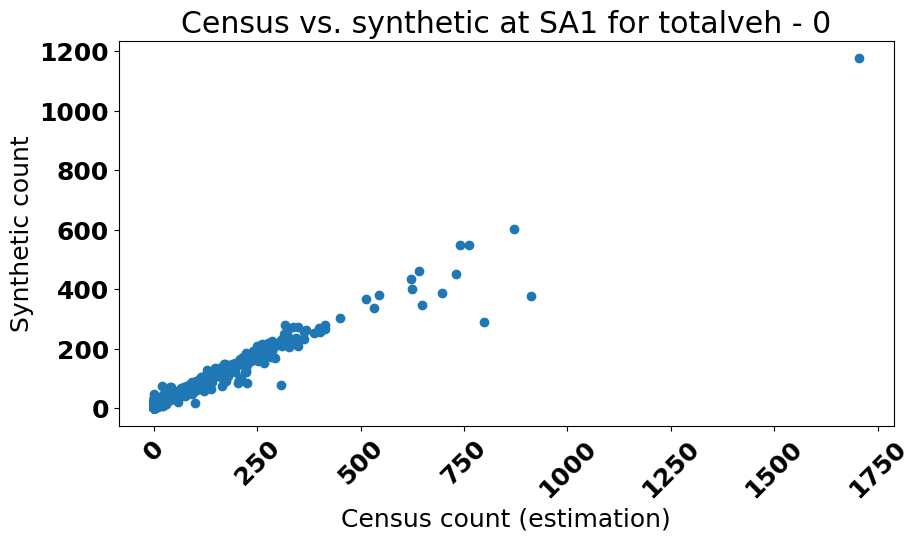

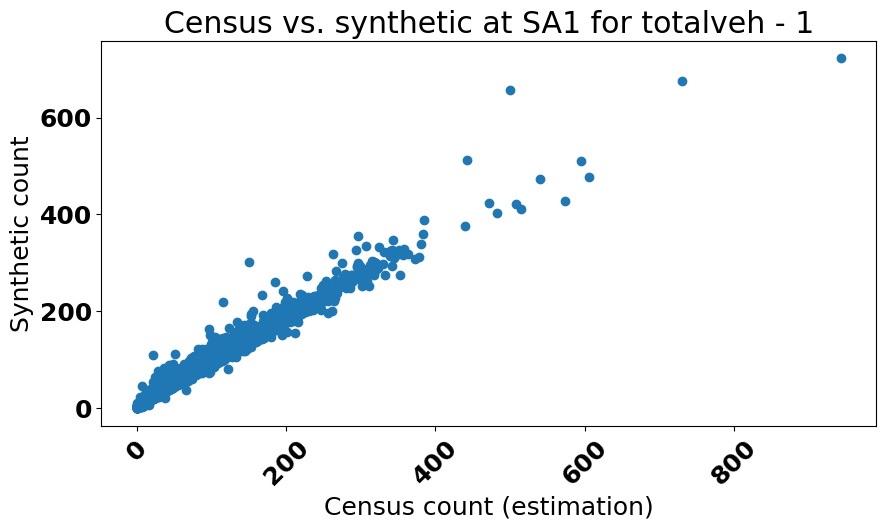

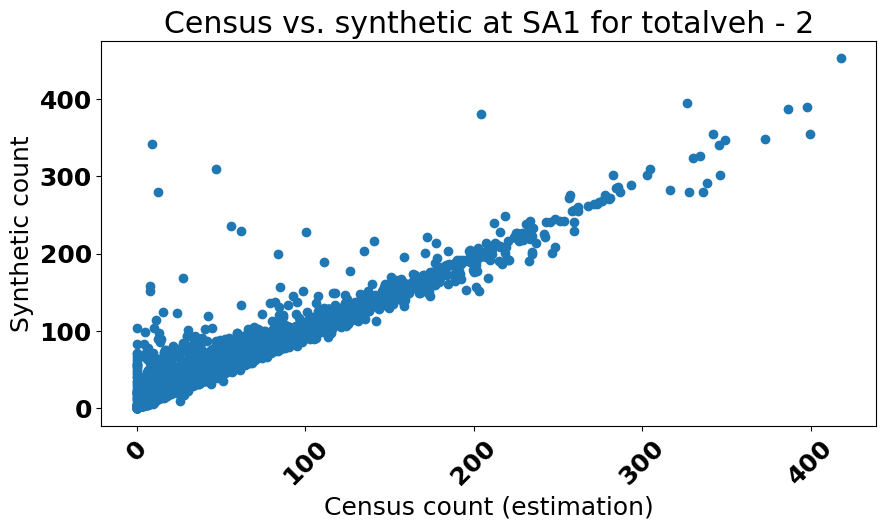

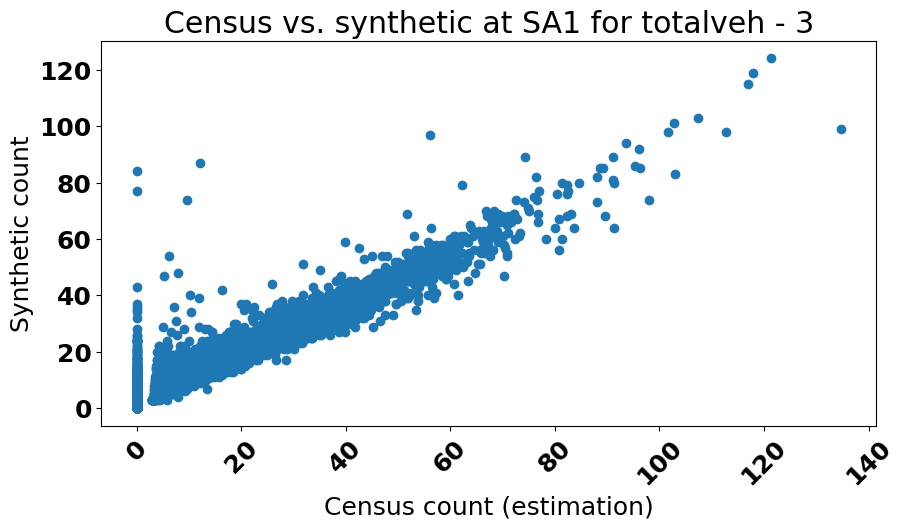

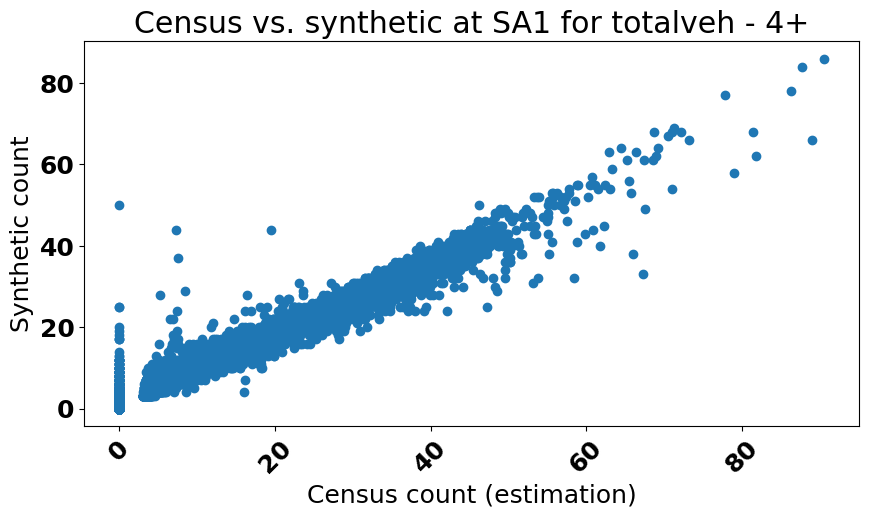

In [75]:
for val in df_census_vehs.columns:
    x = to_plot[val][0],
    y = to_plot[val][1]
    fig = plt.figure(figsize = (10, 5))
    plt.scatter(x=x, y=y)
    plt.xlabel(f"Census count (estimation)")
    plt.ylabel("Synthetic count")
    plt.title(f"Census vs. synthetic at {geo_lev} for totalveh - {val}")
    plt.xticks(rotation=45)
    plt.show()

In [76]:
def plot_bar_syn_rela(rela, att):
    df = syn_pp[syn_pp["relationship"] == rela]
    n_syn = len(df) 
    counts = df[att].value_counts()
    data_syn = []
    data_sample = []
    if rela != "Main":
        df_rela_sample = pd.read_csv(os.path.join(processed_data, f"connect_main_{rela}.csv"))
        sub_df_sample = df_rela_sample.groupby(f"{att}_{rela}")["_weight"].sum() 
    else:
        df_rela_sample = pd.read_csv(os.path.join(processed_data, f"connect_hh_main.csv"))
        sub_df_sample = df_rela_sample.groupby(att)["_weight"].sum()
    n_sample = df_rela_sample["_weight"].sum()
    sub_df_sample = sub_df_sample / n_sample
    for state in atts_labels[att]:
        if state in counts.index:
            data_syn.append((counts.at[state]/n_syn)*100) 
        else:
            data_syn.append(0) 
        if state in sub_df_sample.index:
            data_sample.append((sub_df_sample[state])*100)
        else:
            data_sample.append(0)
    X = atts_labels[att]
    X_axis = np.arange(len(X))
    fig = plt.figure(figsize = (10, 5))
    # creating the bar plot
    plt.bar(X_axis - 0.2, data_syn, 0.4, label = 'Synthetic') 
    plt.bar(X_axis + 0.2, data_sample, 0.4, label = 'VISTA') 
    plt.xlabel(f"{att} groups")
    plt.ylabel(f"Percentage in the {rela} population")
    plt.title(f"Total number people for each {att} groups for {rela}")
    plt.xticks(X_axis, X, rotation=45)
    plt.legend() 
    plt.show()

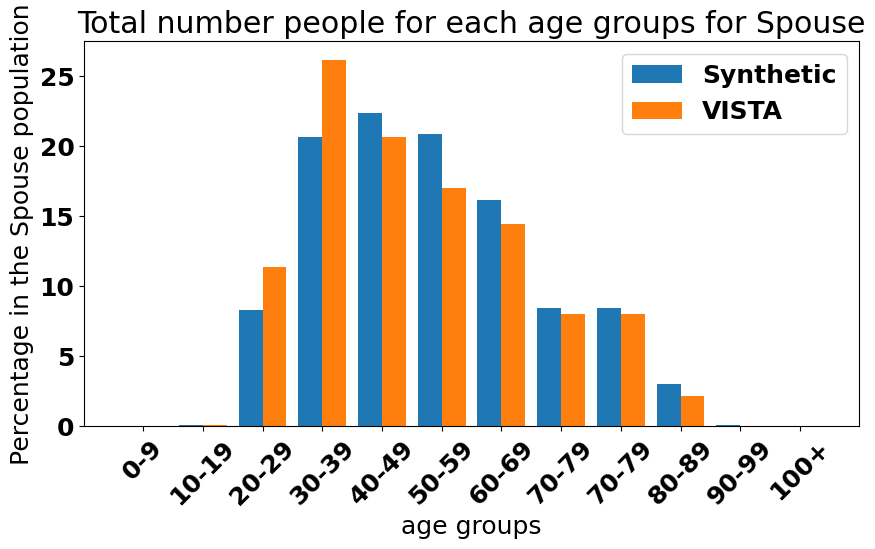

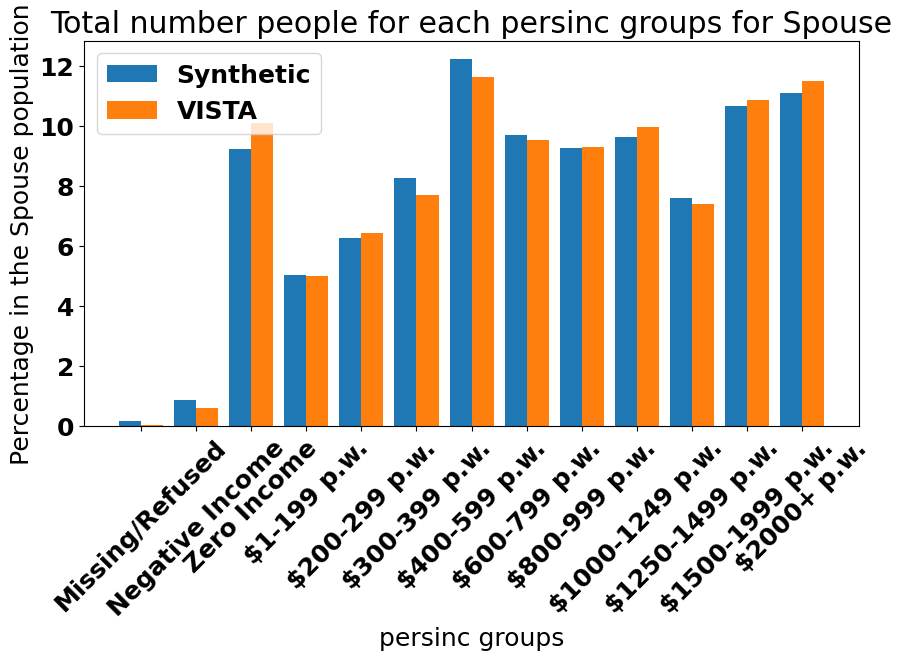

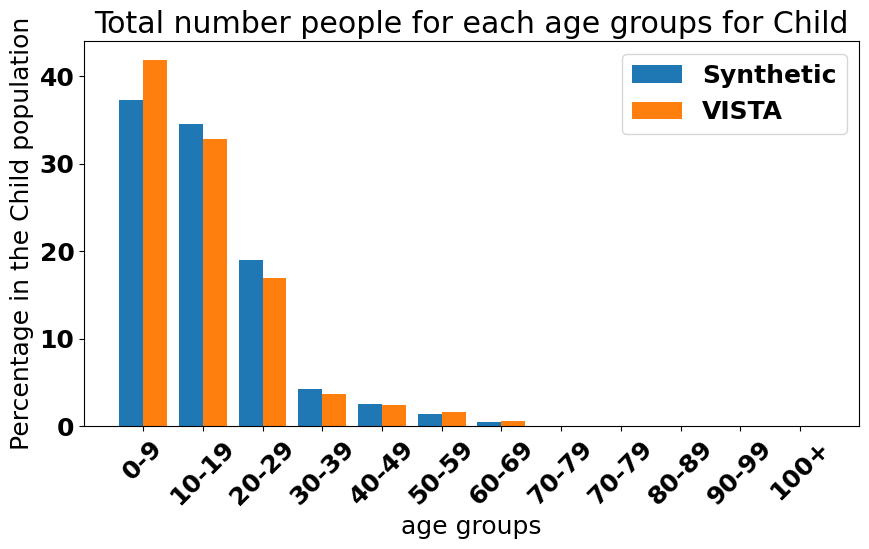

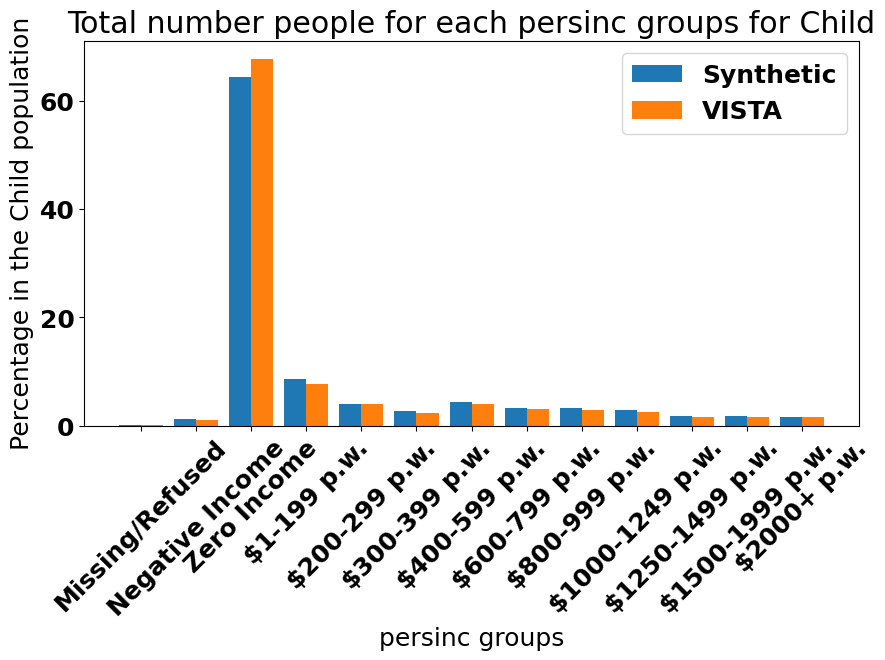

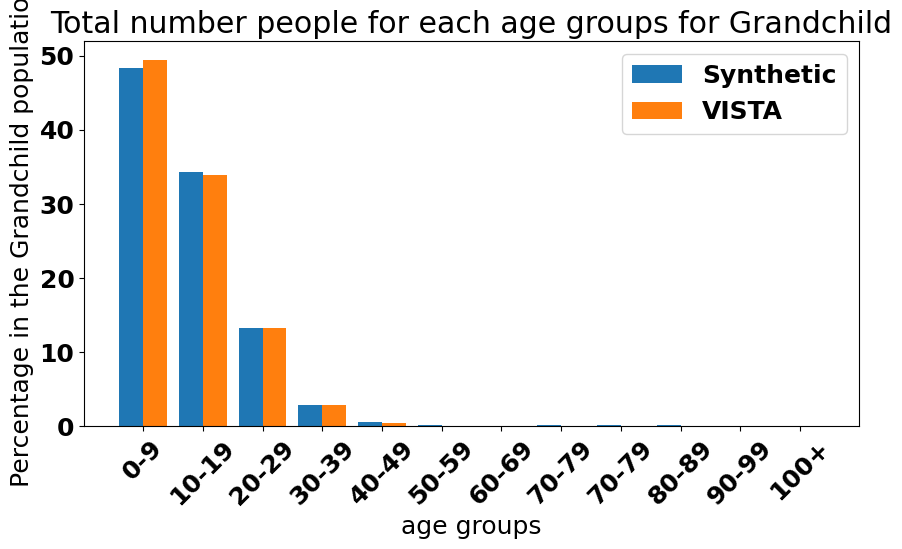

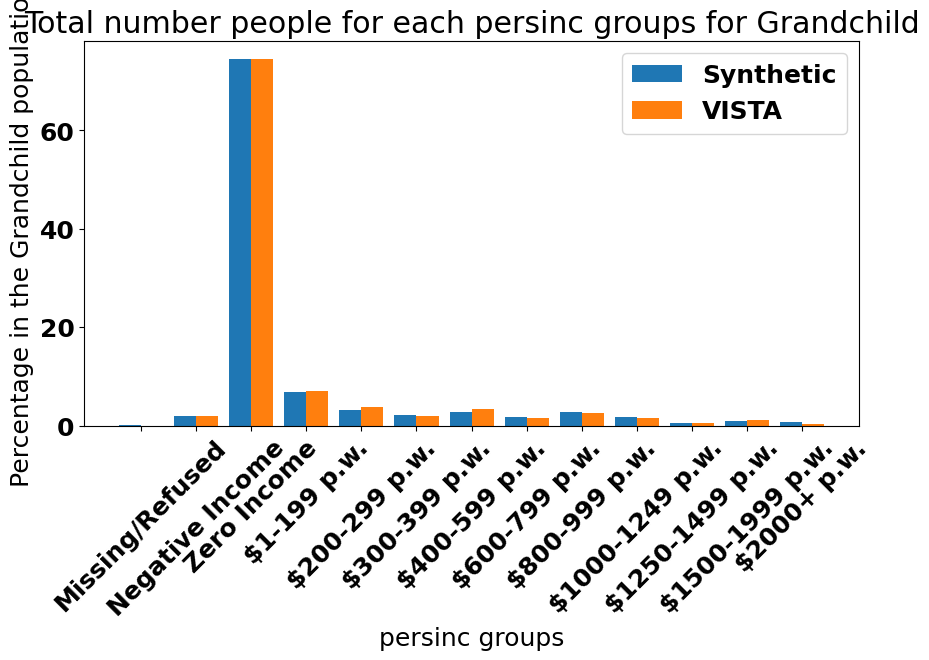

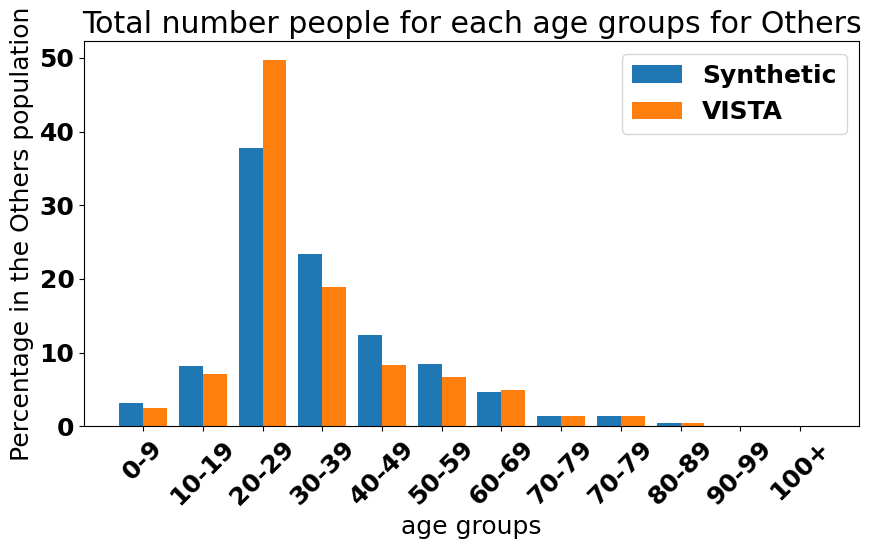

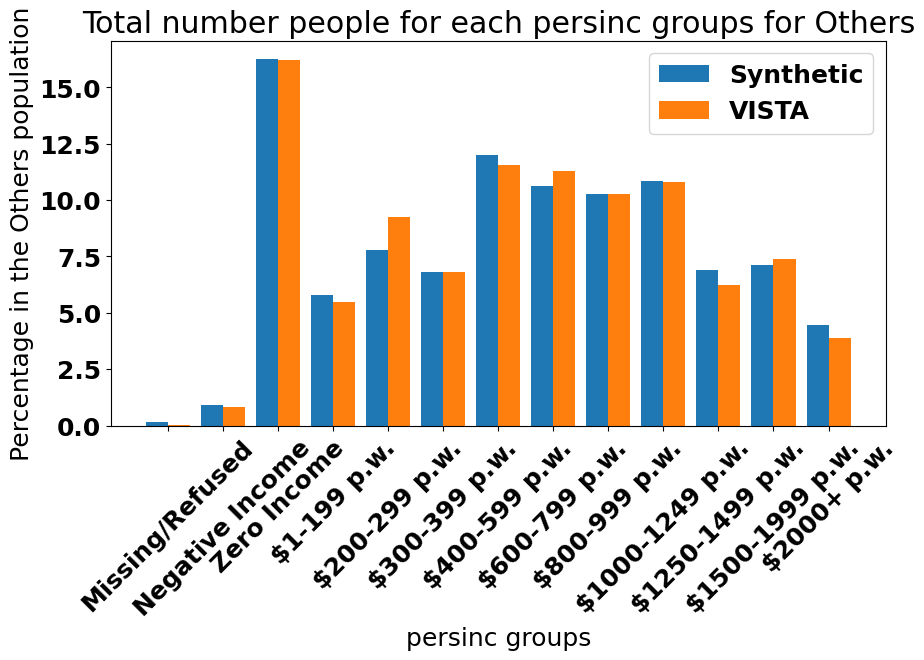

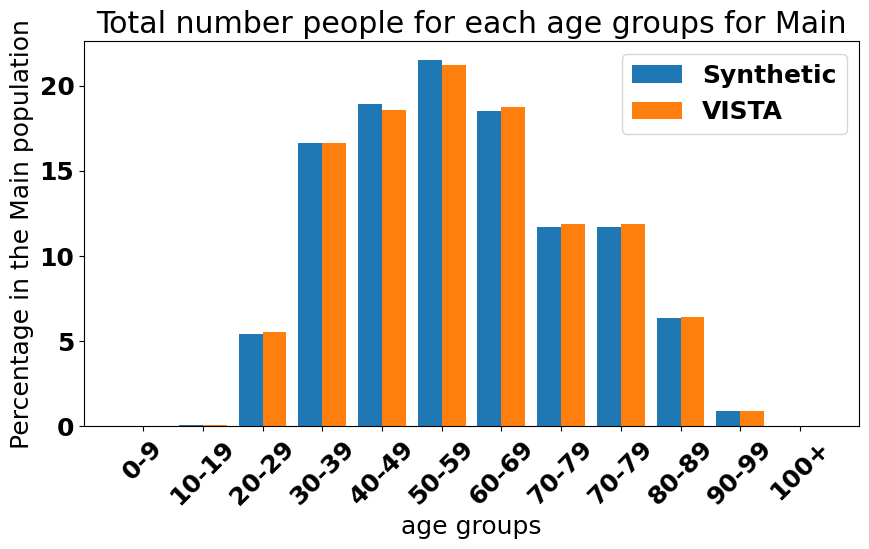

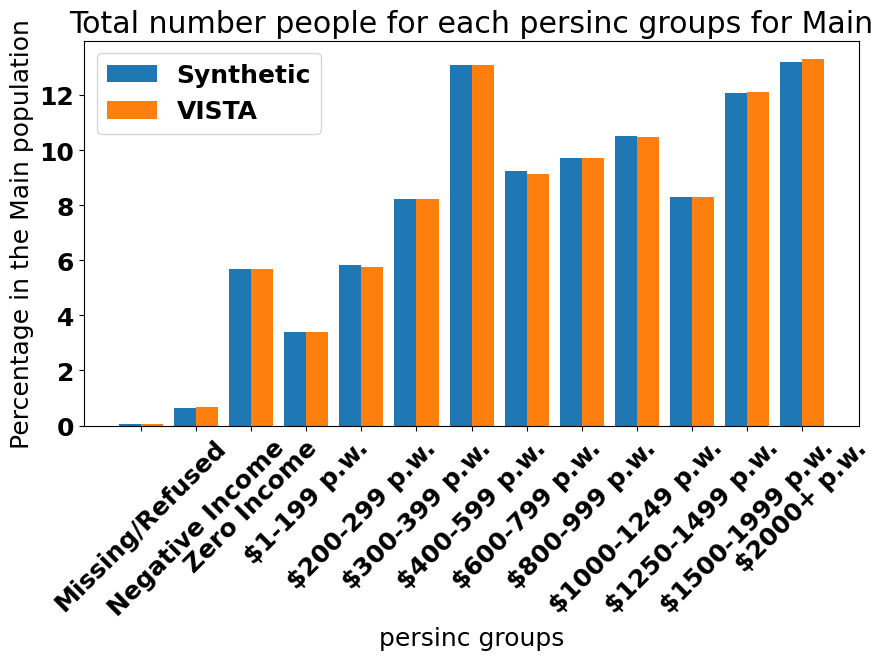

In [77]:
ls_rela = syn_pp["relationship"].unique()
for rela in ls_rela:
    plot_bar_syn_rela(att="age", rela=rela)
    plot_bar_syn_rela(att="persinc", rela=rela)